In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sn
from sklearn.metrics import confusion_matrix
import re
%matplotlib inline
from sklearn import model_selection, preprocessing, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
df_inputdata=pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\New folder\\SpamHam.csv',usecols =[0,1],encoding='latin-1')

In [6]:
df_inputdata.head(5573)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df_inputdata.rename(columns={'v1':'Category','v2':'Message'}, inplace = True)

In [8]:
df_inputdata.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df_inputdata.count()

Category    5572
Message     5572
dtype: int64

In [10]:
df_inputdata.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [11]:
df_inputdata.groupby('Category').count()

,Message
Category,
ham,4825
spam,747


In [12]:
category_count=pd.DataFrame()
category_count['count'] = df_inputdata['Category'].value_counts()

In [13]:
category_count['count']

ham     4825
spam     747
Name: count, dtype: int64

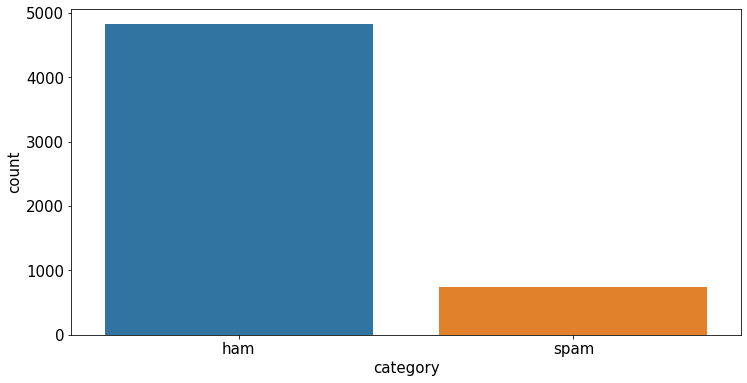

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
sn.barplot(x=category_count.index, y = category_count['count'], ax = ax)
ax.set_ylabel('count', fontsize = 15)
ax.set_xlabel('category', fontsize = 15)
ax.tick_params(labelsize = 15)

In [15]:
#looking at the above numbers of hams and spams, there are more number of hams than spams

In [16]:
#Preprocessing Tweets for removing punctuations(! , '),@,# , https,special characters
def processMessage(tweet):
    from string import punctuation
    tweet = re.sub(r'\&\w*;','',tweet)
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub(r'\$\w*', '',tweet)
    tweet = tweet.lower()
    tweet = re.sub(r'https?:\/\.*\/\w*', '', tweet)
    tweet = re.sub(r'#\w*', '', tweet)
    tweet = re.sub(r'[' + punctuation.replace('@','') + ']+', ' ',tweet)
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    tweet = re.sub(r'\s\s+', '',' ', tweet)
    tweet = tweet.lstrip(' ')
    tweet = ''.join(c for c in tweet if c <= '\uFFFF')
    return tweet

In [17]:
def input_data():
    df_inputdata['Message'] = df_inputdata['Message'].apply(processMessage)

In [18]:
df_inputdata['Message'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [19]:
df_inputdata['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [20]:
#convert  the labels from text to numbers
label_encoder = preprocessing.LabelEncoder()
df_inputdata['Category'] = label_encoder.fit_transform(df_inputdata['Category'])

In [21]:
df_inputdata['Category'].head()

0    0
1    0
2    1
3    0
4    0
Name: Category, dtype: int32

In [22]:
X=df_inputdata.Message
y=df_inputdata.Category

In [23]:
#Split the dataset into 80% and 20% for training and testing respectively
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

In [24]:
type(X_train)

pandas.core.series.Series

In [25]:
#convert the raw document into a matrix of TF-IDF features
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=20000)
#create TF-IDF with X_train
tfidf_vect.fit(X_train)

TfidfVectorizer(max_features=20000, token_pattern='\\w{1,}')

In [26]:
#use TF-IDF created with X_train for transforming X_train and X_test
xtrain_tfidf = tfitfidf_vect.fit(X_df_vect.transform(X_train)
xvalid_tfidf = tfidf_vect.transform(X_test)

In [27]:
#create a model for NavieBayes Model
model=naive_bayes.MultinomialNB()

In [28]:
#train the model with X_train and y_train
model.fit(xtrain_tfidf,y_train)

MultinomialNB()

In [29]:
#get the prediction for X_test which is transformed with TF-IDF
y_pred=model.predict(xvalid_tfidf)

In [30]:
#get accuracy for the model 
metrics.accuracy_score(y_test,y_pred)

0.967713004484305

<AxesSubplot:>

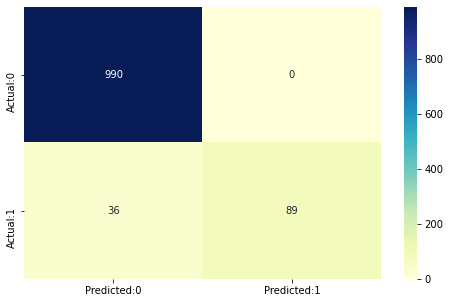

In [31]:
#get the confusion matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix,annot=True,fmt='d',cmap="YlGnBu")

In [32]:
#ham
myData1=np.array(["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k I've cried enough today."])
#spam
myData2=np.array(["SIX chances to win CASH! From  to  pounds txt> CSH11 and send to Cost pday, 6days,  TsandCs apply Reply HL  info"])

In [33]:
myData1=tfidf_vect.transform(myData1)

In [34]:
y_res=model.predict(myData1)

In [35]:
y_res[0]

0

In [36]:
vals=label_encoder.inverse_transform([y_res[0]])

In [37]:
vals[0]

'ham'

In [38]:
vals[0]

'ham'

In [78]:
#spamham
myMultipleData=['Im gonna be home soon and i dont want to talk about this stuff anymore tonight, k Ive cried enough today.',
                'SIX chances to win CASH! From  to  pounds txt> CSH11 and send to Cost pday, 6days,  TsandCs apply Reply HL  info']

In [79]:
df_myMultipleData=pd.DataFrame(myMultipleData,columns={'Message'})

In [81]:
#df_myMultipleData['Message']=df_myMultipleData['Message'].apply(processMessage)

In [82]:
muMultipleData=tfidf_vect.transform(df_myMultipleData['Message'])

In [83]:
y_prelabels=model.predict(muMultipleData)

In [84]:
y_prelabels

array([0, 1])

In [85]:
vals=label_encoder.inverse_transform(y_prelabels)

In [86]:
for val in vals:
    print(val)

ham
spam


In [87]:
from sklearn.metrics import classification_report

In [88]:
report=classification_report(y_test,y_pred,labels=[0,1])

In [89]:
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       990
           1       1.00      0.71      0.83       125

    accuracy                           0.97      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.97      0.97      0.97      1115



In [90]:
type(report)

str

In [91]:
#recall=TP/(TP+FN)
#precission=TP/(TP+FP)
#f1-score=2*(precission*recall)/(precission+recall)

In [92]:
TP=cm[0,0]
FN=cm[0,1]
FP=cm[1,0]
Tn=cm[1,1]

In [93]:
recall=TP/(TP+FN)

In [94]:
recall

1.0

In [95]:
precission=TP/(TP+FP)

In [96]:
precission

0.9649122807017544

In [97]:
flscore=2*(precission*recall)/(precission+recall)

In [98]:
flscore

0.9821428571428572

In [99]:
#good F1 score means low false positives and negatives
#precission-precission is the ratio of correctly predicted positive
#observations to the total predicted positive observations.
#recall (sensitivity)- recall is the ratio of correctly predicted
#positive observations to the all observations in actual class
#F1 score-f1 score is the weighted average of precission and recall